### Station S3 and QU39 Comparison

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime as dt
from salishsea_tools import evaltools as et, places, viz_tools, visualisations, bloomdrivers
import pandas as pd
import pickle
import os

%matplotlib inline

In [7]:
modver='201905'
savedir='/ocean/aisabell/MEOPAR/extracted_files'
startyear=2007
endyear=2021 # does NOT include this value

**Load bloom timing variables for S3**

In [8]:
# loop through years of spring time series (mid feb-june) for bloom timing for 201905 run
years=list()
s3bloomtime1=list()
s3bloomtime2=list()
s3bloomtime3=list()
for year in range(startyear,endyear):
    loc='S3'
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    # put code that calculates bloom timing here
    bt1=bloomdrivers.metric1_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt2=bloomdrivers.metric2_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt3=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    years.append(year)
    s3bloomtime1.append(bt1)
    s3bloomtime2.append(bt2)
    s3bloomtime3.append(bt3)   
years=np.array(years)
s3bloomtime1=np.array(s3bloomtime1)
s3bloomtime2=np.array(s3bloomtime2)
s3bloomtime3=np.array(s3bloomtime3)

# get year day
s3yearday1=et.datetimeToYD(s3bloomtime1)  # convert to year day tool
s3yearday2=et.datetimeToYD(s3bloomtime2)
s3yearday3=et.datetimeToYD(s3bloomtime3)

**Load bloom timing variables for QU39**

In [9]:
# loop through years of spring time series (mid feb-june) for bloom timing for 201905 run
qu39bloomtime1=list()
qu39bloomtime2=list()
qu39bloomtime3=list()
for year in range(startyear,endyear):
    loc='QU39'
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    # put code that calculates bloom timing here
    bt1=bloomdrivers.metric1_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt2=bloomdrivers.metric2_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    bt3=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    qu39bloomtime1.append(bt1)
    qu39bloomtime2.append(bt2)
    qu39bloomtime3.append(bt3)   
qu39bloomtime1=np.array(qu39bloomtime1)
qu39bloomtime2=np.array(qu39bloomtime2)
qu39bloomtime3=np.array(qu39bloomtime3)

# get year day
qu39yearday1=et.datetimeToYD(qu39bloomtime1)  # convert to year day tool
qu39yearday2=et.datetimeToYD(qu39bloomtime2)
qu39yearday3=et.datetimeToYD(qu39bloomtime3)

**Load bloom timing variables for SJDF**

In [18]:
#bloomtime1=list()
SJDFbloomtime2=list()
SJDFbloomtime3=list()
for year in range(startyear,endyear):
    loc='SJDF'
    fname3=f'springBloomTime_{str(year)}_{loc}_{modver}.pkl'
    savepath3=os.path.join(savedir,fname3)
    bio_time0,sno30,sdiat0,sflag0,scili0,diat_alld0,no3_alld0,flag_alld0,cili_alld0,phyto_alld0,\
                 intdiat0,intphyto0,fracdiat0,sphyto0,percdiat0=pickle.load(open(savepath3,'rb'))
    SJDFbt2=bloomdrivers.metric2_bloomtime(phyto_alld0,no3_alld0,bio_time0)
    SJDFbt3=bloomdrivers.metric3_bloomtime(sphyto0,sno30,bio_time0)
    SJDFbloomtime2.append(SJDFbt2)
    SJDFbloomtime3.append(SJDFbt3)   

#bloomtime1=np.array(bloomtime1)
SJDFbloomtime2=np.array(SJDFbloomtime2)
SJDFbloomtime3=np.array(SJDFbloomtime3)

# get year day
#yearday1=et.datetimeToYD(bloomtime1)  # convert to year day tool
SJDFyearday2=et.datetimeToYD(SJDFbloomtime2)
SJDFyearday3=et.datetimeToYD(SJDFbloomtime3)

In [19]:
SJDFyearday2

[119, 115, 116, 132, 142, 121, 123, 100, 100, 107, 123, 123, 90, 108]

### Bloom Date Time Series

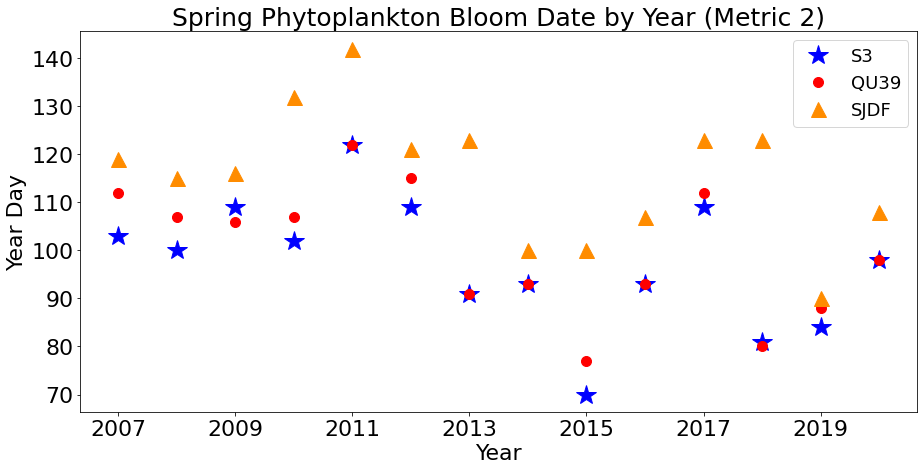

In [22]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plot bloomtime for each year: 
fig,ax=plt.subplots(1,1,figsize=(15,7))

p1=ax.plot(years,s3yearday2, '*',color='b',label='S3',markersize=20)
p2=ax.plot(years,qu39yearday2, 'o',color='r',label='QU39',markersize=10)
p3=ax.plot(years,SJDFyearday2, '^',color='darkorange',label='SJDF',markersize=15)

ax.set_ylabel('Year Day')
ax.set_xlabel('Year')
ax.set_title('Spring Phytoplankton Bloom Date by Year (Metric 2)',size=25)
ax.set_xticks([2007,2009,2011,2013,2015,2017,2019])
ax.legend(handles=[p1[0],p2[0],p3[0]])
#fig.savefig('/ocean/aisabell/MEOPAR/report_figures/S3_vs_QU39.png',dpi=300)

**Combine separate year files into arrays:**

In [12]:
# loop through years (for location specific drivers)

years=list()
windjan=list()
windfeb=list()
windmar=list()
solarjan=list()
solarfeb=list()
solarmar=list()
parjan=list()
parfeb=list()
parmar=list()
tempjan=list()
tempfeb=list()
tempmar=list()
saljan=list()
salfeb=list()
salmar=list()
zoojan=list()
zoofeb=list()
zoomar=list()
mesozoojan=list()
mesozoofeb=list()
mesozoomar=list()
microzoojan=list()
microzoofeb=list()
microzoomar=list()
intzoojan=list()
intzoofeb=list()
intzoomar=list()
intmesozoojan=list()
intmesozoofeb=list()
intmesozoomar=list()
intmicrozoojan=list()
intmicrozoofeb=list()
intmicrozoomar=list()
midno3jan=list()
midno3feb=list()
midno3mar=list()

for year in range(startyear,endyear):
    loc='S3'
    fname=f'JanToMarch_TimeSeries_{year}_{loc}_{modver}.pkl'
    savepath=os.path.join(savedir,fname)
    bio_time,diat_alld,no3_alld,flag_alld,cili_alld,microzoo_alld,mesozoo_alld,\
            intdiat,intphyto,spar,intmesoz,intmicroz,grid_time,temp,salinity,u_wind,v_wind,twind,\
            solar,no3_30to90m,sno3,sdiat,sflag,scili,intzoop,fracdiat,zoop_alld,sphyto,phyto_alld,\
            percdiat,wspeed,winddirec=pickle.load(open(savepath,'rb'))
    # put code that calculates drivers here
    wind=bloomdrivers.D1_3monthly_avg(twind,wspeed)
    solar=bloomdrivers.D1_3monthly_avg(twind,solar)
    par=bloomdrivers.D1_3monthly_avg(bio_time,spar)
    temp=bloomdrivers.D1_3monthly_avg(grid_time,temp)
    sal=bloomdrivers.D1_3monthly_avg(grid_time,salinity)
    zoo=bloomdrivers.D2_3monthly_avg(bio_time,zoop_alld)
    mesozoo=bloomdrivers.D2_3monthly_avg(bio_time,mesozoo_alld)
    microzoo=bloomdrivers.D2_3monthly_avg(bio_time,microzoo_alld)
    intzoo=bloomdrivers.D1_3monthly_avg(bio_time,intzoop)
    intmesozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmesoz)
    intmicrozoo=bloomdrivers.D1_3monthly_avg(bio_time,intmicroz)
    midno3=bloomdrivers.D1_3monthly_avg(bio_time,no3_30to90m)
    
    years.append(year)
    windjan.append(wind[0])
    windfeb.append(wind[1])
    windmar.append(wind[2])   
    solarjan.append(solar[0])
    solarfeb.append(solar[1])
    solarmar.append(solar[2])
    parjan.append(par[0])
    parfeb.append(par[1])
    parmar.append(par[2])
    tempjan.append(temp[0])
    tempfeb.append(temp[1])
    tempmar.append(temp[2])
    saljan.append(sal[0])
    salfeb.append(sal[1])
    salmar.append(sal[2])
    zoojan.append(zoo[0])
    zoofeb.append(zoo[1])
    zoomar.append(zoo[2])
    mesozoojan.append(mesozoo[0])
    mesozoofeb.append(mesozoo[1])
    mesozoomar.append(mesozoo[2])
    microzoojan.append(microzoo[0])
    microzoofeb.append(microzoo[1])
    microzoomar.append(microzoo[2])
    intzoojan.append(intzoo[0])
    intzoofeb.append(intzoo[1])
    intzoomar.append(intzoo[2])
    intmesozoojan.append(intmesozoo[0])
    intmesozoofeb.append(intmesozoo[1])
    intmesozoomar.append(intmesozoo[2])
    intmicrozoojan.append(intmicrozoo[0])
    intmicrozoofeb.append(intmicrozoo[1])
    intmicrozoomar.append(intmicrozoo[2])
    midno3jan.append(midno3[0])
    midno3feb.append(midno3[1])
    midno3mar.append(midno3[2])

years=np.array(years)
windjan=np.array(windjan)
windfeb=np.array(windfeb)
windmar=np.array(windmar)
solarjan=np.array(solarjan)
solarfeb=np.array(solarfeb)
solarmar=np.array(solarmar)
parjan=np.array(parjan)
parfeb=np.array(parfeb)
parmar=np.array(parmar)
tempjan=np.array(tempjan)
tempfeb=np.array(tempfeb)
tempmar=np.array(tempmar)
saljan=np.array(saljan)
salfeb=np.array(salfeb)
salmar=np.array(salmar)
zoojan=np.array(zoojan)
zoofeb=np.array(zoofeb)
zoomar=np.array(zoomar)
mesozoojan=np.array(mesozoojan)
mesozoofeb=np.array(mesozoofeb)
mesozoomar=np.array(mesozoomar)
microzoojan=np.array(microzoojan)
microzoofeb=np.array(microzoofeb)
microzoomar=np.array(microzoomar)
intzoojan=np.array(intzoojan)
intzoofeb=np.array(intzoofeb)
intzoomar=np.array(intzoomar)
intmesozoojan=np.array(intmesozoojan)
intmesozoofeb=np.array(intmesozoofeb)
intmesozoomar=np.array(intmesozoomar)
intmicrozoojan=np.array(intmicrozoojan)
intmicrozoofeb=np.array(intmicrozoofeb)
intmicrozoomar=np.array(intmicrozoomar)
midno3jan=np.array(midno3jan)
midno3feb=np.array(midno3feb)
midno3mar=np.array(midno3mar)

### Monthly average wind speed cubed (January-March)

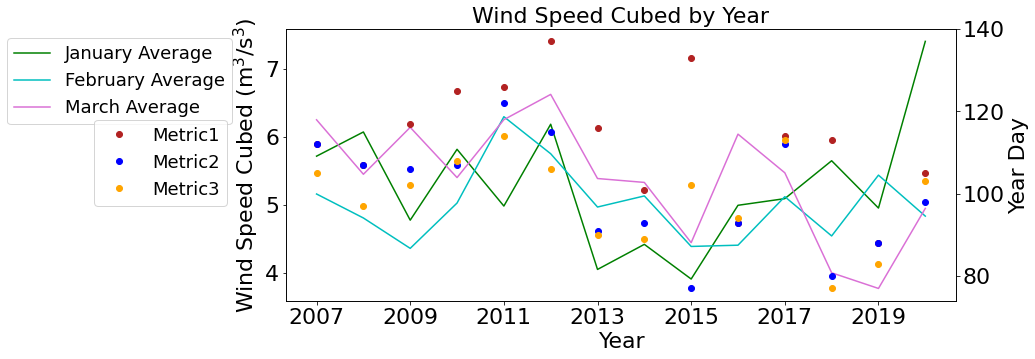

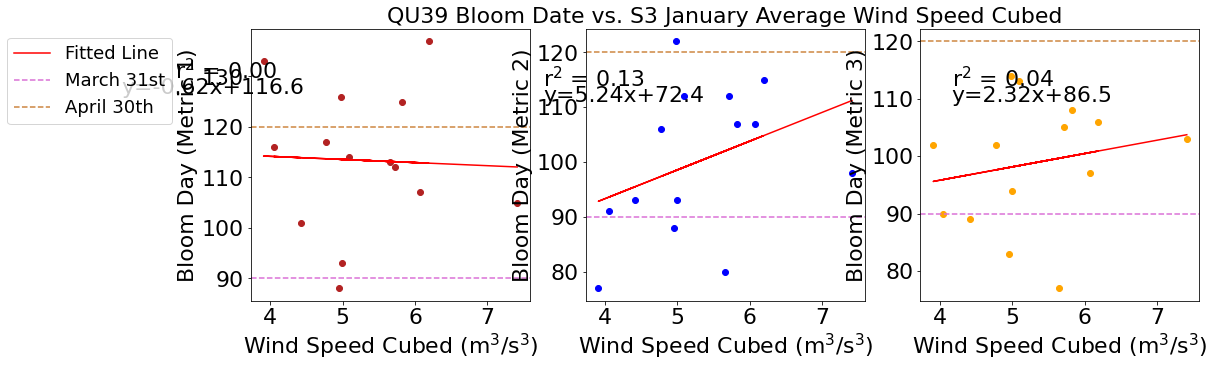

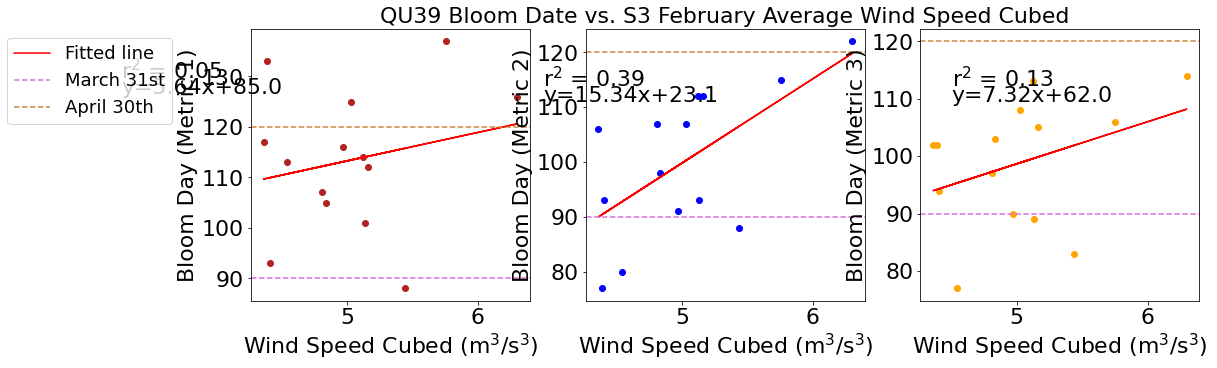

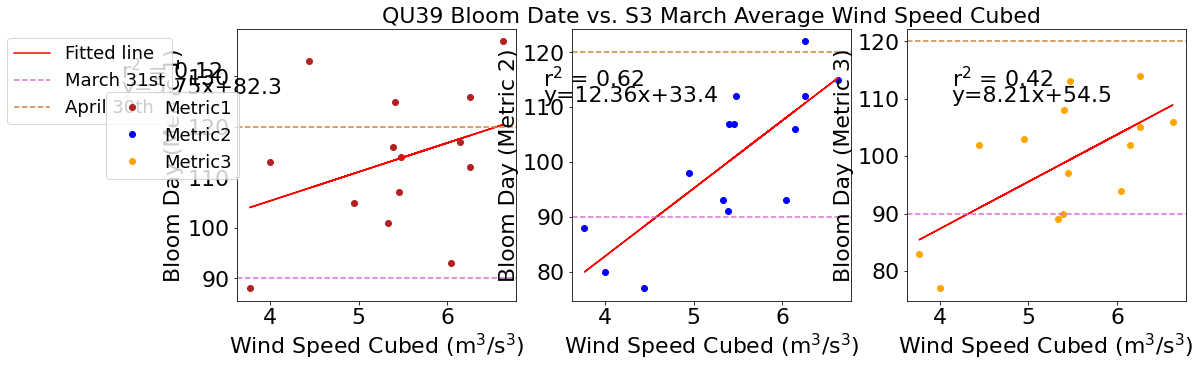

In [24]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
p1=ax.plot(years,windjan, '-',color='green',label='January Average')
p2=ax.plot(years,windfeb, '-',color='c',label='February Average')
p3=ax.plot(years,windmar, '-',color='orchid',label='March Average')
ax.set_ylabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax.set_xlabel('Year')
ax.set_title('Wind Speed Cubed by Year')
ax.set_xticks([2007,2009,2011,2013,2015,2017,2019])
ax.legend(handles=[p1[0],p2[0],p3[0]],bbox_to_anchor=(-0.43, 1.0), loc='upper left')

ax1=ax.twinx()
p4=ax1.plot(years,qu39yearday1, 'o',color='firebrick',label='Metric1')
p5=ax1.plot(years,qu39yearday2, 'o',color='b',label='Metric2')
p6=ax1.plot(years,qu39yearday3, 'o',color='orange',label='Metric3')
ax1.set_ylabel('Year Day')
ax1.legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(-0.3, 0.7), loc='upper left')

# ---------- Jan ---------
fig2,ax2=plt.subplots(1,3,figsize=(17,5))
ax2[0].plot(windjan,qu39yearday1,'o',color='firebrick')
ax2[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax2[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(windjan,qu39yearday1)
ax2[0].plot(windjan, y, 'r', label='Fitted Line')
ax2[0].text(0.1, 0.9, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax2[0].text(0.02,0.83,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].plot(windjan,qu39yearday2,'o',color='b')
ax2[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax2[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(windjan,qu39yearday2)
ax2[1].plot(windjan, y, 'r', label='Fitted line')
ax2[1].text(0.65, 0.87, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax2[1].text(0.65,0.8,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[2].plot(windjan,qu39yearday3,'o',color='orange')
ax2[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax2[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(windjan,qu39yearday3)
ax2[2].plot(windjan, y, 'r', label='Fitted line')
ax2[2].text(1.26, 0.87, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax2[2].text(1.26,0.8,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax2[1].set_title('QU39 Bloom Date vs. S3 January Average Wind Speed Cubed')

# ---------- Feb ---------
fig3,ax3=plt.subplots(1,3,figsize=(17,5))
ax3[0].plot(windfeb,qu39yearday1,'o',color='firebrick')
ax3[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax3[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(windfeb,qu39yearday1)
ax3[0].plot(windfeb, y, 'r', label='Fitted line')
ax3[0].text(0.02, 0.9, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax3[0].text(0.02,0.83,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].plot(windfeb,qu39yearday2,'o',color='b')
ax3[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax3[1].set_ylabel('Bloom Day (Metric 2)')
y,r2,m,b=bloomdrivers.reg_r2(windfeb,qu39yearday2)
ax3[1].plot(windfeb, y, 'r', label='Fitted line')
ax3[1].text(0.65, 0.87, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax3[1].text(0.65,0.8,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[2].plot(windfeb,qu39yearday3,'o',color='orange')
ax3[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax3[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(windfeb,qu39yearday3)
ax3[2].plot(windfeb, y, 'r', label='Fitted line')
ax3[2].text(1.26, 0.87, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax3[2].text(1.26,0.8,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax3[1].set_title('QU39 Bloom Date vs. S3 February Average Wind Speed Cubed')

# ---------- March ---------
fig4,ax4=plt.subplots(1,3,figsize=(17,5))
ax4[0].plot(windmar,qu39yearday1,'o',color='firebrick')
ax4[0].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[0].set_ylabel('Bloom Day (Metric 1)')
y,r2,m,b=bloomdrivers.reg_r2(windmar,qu39yearday1)
ax4[0].plot(windmar, y, 'r', label='Fitted line')
ax4[0].text(0.02, 0.9, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax4[0].text(0.02,0.83,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[1].plot(windmar,qu39yearday2,'o',color='b')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[1].set_title('QU39 Bloom Date vs. S3 March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,qu39yearday2)
ax4[1].plot(windmar, y, 'r', label='Fitted line')
ax4[1].text(0.65, 0.87, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax4[1].text(0.65,0.8,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

ax4[2].plot(windmar,qu39yearday3,'o',color='orange')
ax4[2].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[2].set_ylabel('Bloom Day (Metric 3)')
y,r2,m,b=bloomdrivers.reg_r2(windmar,qu39yearday3)
ax4[2].plot(windmar, y, 'r', label='Fitted line')
ax4[2].text(1.26, 0.87, '$\mathregular{r^2}$ = %.2f'%r2,transform=ax.transAxes)
ax4[2].text(1.26,0.8,f'y={round(m,2)}x+{round(b,1)}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

# Jan month lines
ax2[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
ax2[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax2[1].axhline(y=90, color='orchid', linestyle='--')
ax2[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax2[1].axhline(y=120, color='peru', linestyle='--')
ax2[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# Feb month lines
ax3[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
ax3[0].legend(bbox_to_anchor=(-0.25, 1.0))
ax3[1].axhline(y=90, color='orchid', linestyle='--')
ax3[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax3[1].axhline(y=120, color='peru', linestyle='--')
ax3[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
# March month lines
ax4[0].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[0].axhline(y=120, color='peru', linestyle='--',label='April 30th')
ax4[0].legend(bbox_to_anchor=(-0.2, 1.0))
ax4[1].axhline(y=90, color='orchid', linestyle='--')
ax4[2].axhline(y=90, color='orchid', linestyle='--',label='March 31st')
ax4[1].axhline(y=120, color='peru', linestyle='--')
ax4[2].axhline(y=120, color='peru', linestyle='--',label='April 30th')
ax4[1].legend(handles=[p4[0],p5[0],p6[0]],bbox_to_anchor=(-1.7, 0.8), loc='upper left')

Text(0.4, 0.5, '$\\mathregular{r^2}$ = 0.62')

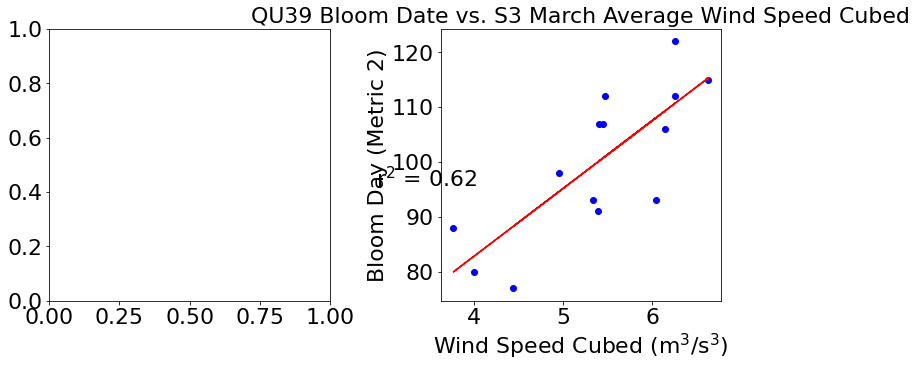

In [14]:


# ---------- March ---------
fig4,ax4=plt.subplots(1,2,figsize=(10,5),constrained_layout=True)

ax4[1].plot(windmar,qu39yearday2,'o',color='b')
ax4[1].set_xlabel('Wind Speed Cubed ($\mathregular{m^3}$/$\mathregular{s^3}$)')
ax4[1].set_ylabel('Bloom Day (Metric 2)')
ax4[1].set_title('QU39 Bloom Date vs. S3 March Average Wind Speed Cubed')
y,r2,m,b=bloomdrivers.reg_r2(windmar,qu39yearday2)
ax4[1].plot(windmar, y, 'r', label='Fitted line')
ax4[1].text(0.4, 0.5, '$\mathregular{r^2}$ = %.2f'%r2, transform=ax.transAxes)
#ax4[1].text(0.6,0.81,f'y={m}x+{b}',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)

